In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs


In [44]:
sbs.set()

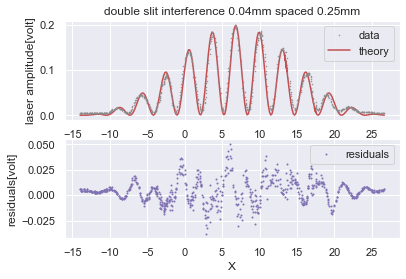

s:0.07265430922076999
p1:0.15201390271349727
p2:0.11589306432338128
offset:6.822777838219329
R^2:0.9478387650163375


In [45]:
def model_integrate(xdata,model,s,p1,p2,of):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s,100),p1,p2,of))/100
    return ydata

def newmodel(x,s ,p1,p2,of):
    return model_integrate(x,es.double_slit_model,s,p1,p2,of)

pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
L=25.0e-5
A=20
offset = es.offset+6.5
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))

data=es.read('exp1125/original parameters/double slit/0.04w 0.25s slit not centered symmeyricly','sweep1.txt')
r,c=[400,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.subplot(211)
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( s+0.001*s,np.inf,np.inf,np.inf)))
plt.plot(xdata2,newmodel(xdata2,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.subplot(212)
plt.plot(xdata2,ydata-newmodel(xdata2,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['residuals','theory'])
plt.xlabel('X')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))



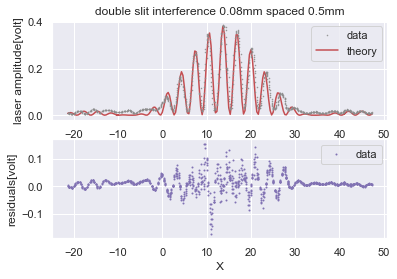

s:0.14661508953641894
p1:0.15045020573981327
p2:0.05875963636389045
offset:13.730047401566479
R^2:0.8627547604878171


In [46]:
pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=50.0e-5
A=10
offset = es.offset+15
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))

data=es.read('exp1125/original parameters/double slit/0.08w 0.5s','sweep1.txt')
r,c=[500,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.subplot(211)
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( s+0.01*s,np.inf,np.inf,np.inf)))
plt.plot(xdata2,model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.08mm spaced 0.5mm')
plt.xlabel('X')
plt.ylabel('laser amplitude[volt]')
plt.subplot(212)
plt.plot(xdata2,ydata-model_integrate(xdata2,es.double_slit_model,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.xlabel('X')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))

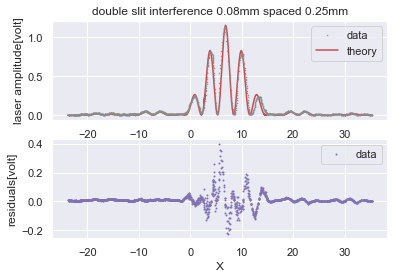

s:0.07330754476820947
p1:0.316218847353355
p2:0.08626294564351746
offset:6.874775951365272
R^2:0.9520237570011169


In [47]:
pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=25.0e-5
A=10
offset = es.offset+6.1
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))


data=es.read('exp1125/original parameters/double slit/0.08w 0.25s','sweep1.txt')
r,c=[800,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.subplot(211)
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( s+0.01*s,np.inf,np.inf,np.inf)))
plt.plot(xdata2,model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.08mm spaced 0.25mm')
plt.xlabel('X')
plt.ylabel('laser amplitude[volt]')
plt.subplot(212)
plt.plot(xdata2,ydata-model_integrate(xdata2,es.double_slit_model,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.xlabel('X')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))



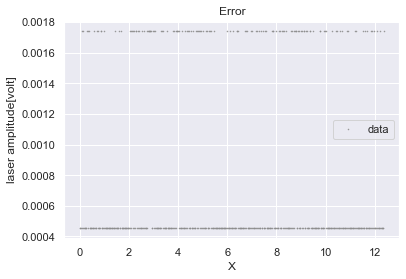

In [48]:
data=es.read('exp1125/original parameters/parameters','sensor noise with iris.txt')
xdata=data['time']
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
plt.legend(['data'])
plt.title('Error')
plt.xlabel('X')
plt.ylabel('laser amplitude[volt]')
plt.show()

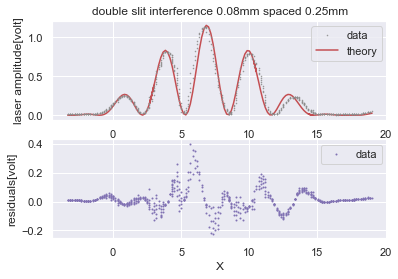

s:0.07983990024260439
p1:0.3155025532630543
p2:0.08604788426140475
offset:6.875411478456717
R^2:0.9370187330625377


ValueError: `x0` is infeasible.

In [55]:
pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=25.0e-5
A=10
offset = es.offset+6.1
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))



data=es.read('exp1125/original parameters/double slit/0.08w 0.25s','sweep1.txt')
r,c=[300,2100]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.subplot(211)
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( s*1.1,np.inf,np.inf,np.inf)))
plt.plot(xdata2,model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.08mm spaced 0.25mm')
plt.xlabel('X')
plt.ylabel('laser amplitude[volt]')
plt.subplot(212)
plt.plot(xdata2,ydata-model_integrate(xdata2,es.double_slit_model,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.xlabel('X')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))

popt,pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((s,0.3154      ,0.0859     ,6.874),
                                 ( 2*s,0.3156,0.0861,6.875)))
plt.plot(xdata2,model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.08mm spaced 0.25mm')
plt.xlabel('X')
plt.ylabel('laser amplitude[volt]')
plt.subplot(212)
plt.plot(xdata2,ydata-model_integrate(xdata2,es.double_slit_model,*popt),'.',markersize=2,zorder=2,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.xlabel('X')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))